In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from scipy.stats import norm

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv" , sep=",")

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
print("Počet duplikátov: ", data.duplicated().sum())

Počet duplikátov:  0


In [7]:
#Zmena kategorických dát na string
data['anaemia'] = data['anaemia'].apply(str)
data['diabetes'] = data['diabetes'].apply(str)
data['high_blood_pressure'] = data['high_blood_pressure'].apply(str)
data['smoking'] = data['smoking'].apply(str)
data['sex'] = data['sex'].apply(str)
data['DEATH_EVENT'] = data['DEATH_EVENT'].apply(str)

In [8]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


D:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


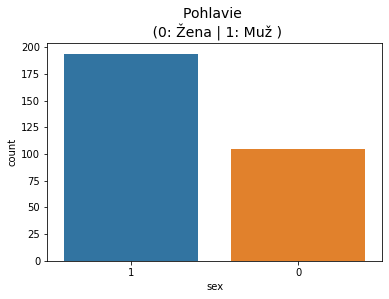

In [9]:
#Exploračná analýza
#Rozdelenie pohlaví
sns.countplot(data['sex'])
plt.title('Pohlavie \n (0: Žena | 1: Muž )', fontsize=14)
plt.show()

In [10]:
#Z rozdelenia pohlaví vidíme, že väčšinové zastúpenie v tomto datasete majú muži

D:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


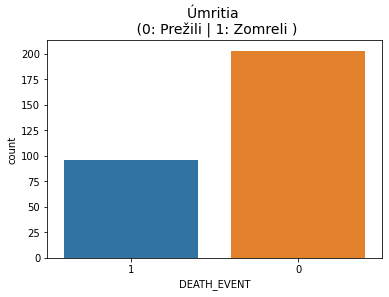

In [11]:
#Rozdelenie úmrtí
sns.countplot(data['DEATH_EVENT'])
plt.title('Úmritia \n (0: Prežili | 1: Zomreli )', fontsize=14)
plt.show()

In [12]:
#Z rozdelenia úmrtí môžeme dedukovať, že u väčšiny pacientov nenastala smrť

D:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


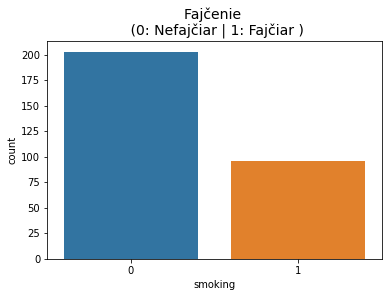

In [13]:
#Rozdelenie fajčiarov
sns.countplot(data['smoking'])
plt.title('Fajčenie \n (0: Nefajčiar | 1: Fajčiar )', fontsize=14)
plt.show()

In [14]:
#Z rozdelenia fajčiarov usudzujeme, že väčšina pacientov nefajčila

D:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


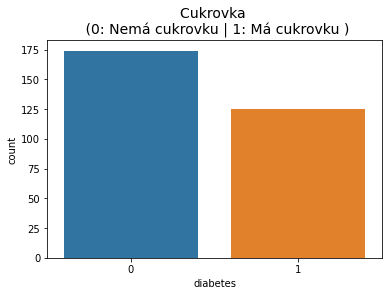

In [15]:
#Rozdelenie pacientov s cukrovkou
sns.countplot(data['diabetes'])
plt.title('Cukrovka \n (0: Nemá cukrovku | 1: Má cukrovku )', fontsize=14)
plt.show()

In [16]:
#Z grafu vyššie vieme povedať, že väčšina z pacientov netrpí cukrovkou

D:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


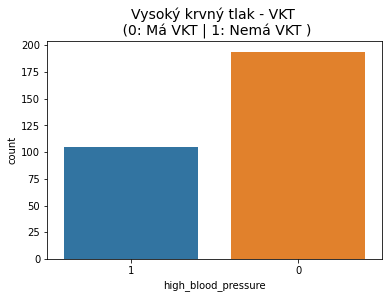

In [17]:
#Rozdelenie pacientov s vysokým krvným tlakom
sns.countplot(data['high_blood_pressure'])
plt.title('Vysoký krvný tlak - VKT \n (0: Má VKT | 1: Nemá VKT )', fontsize=14)
plt.show()

In [18]:
#Podľa grafu rozdelenia vidíme, že väčšina pacientov nemá problém s vysokým krvným tlakom

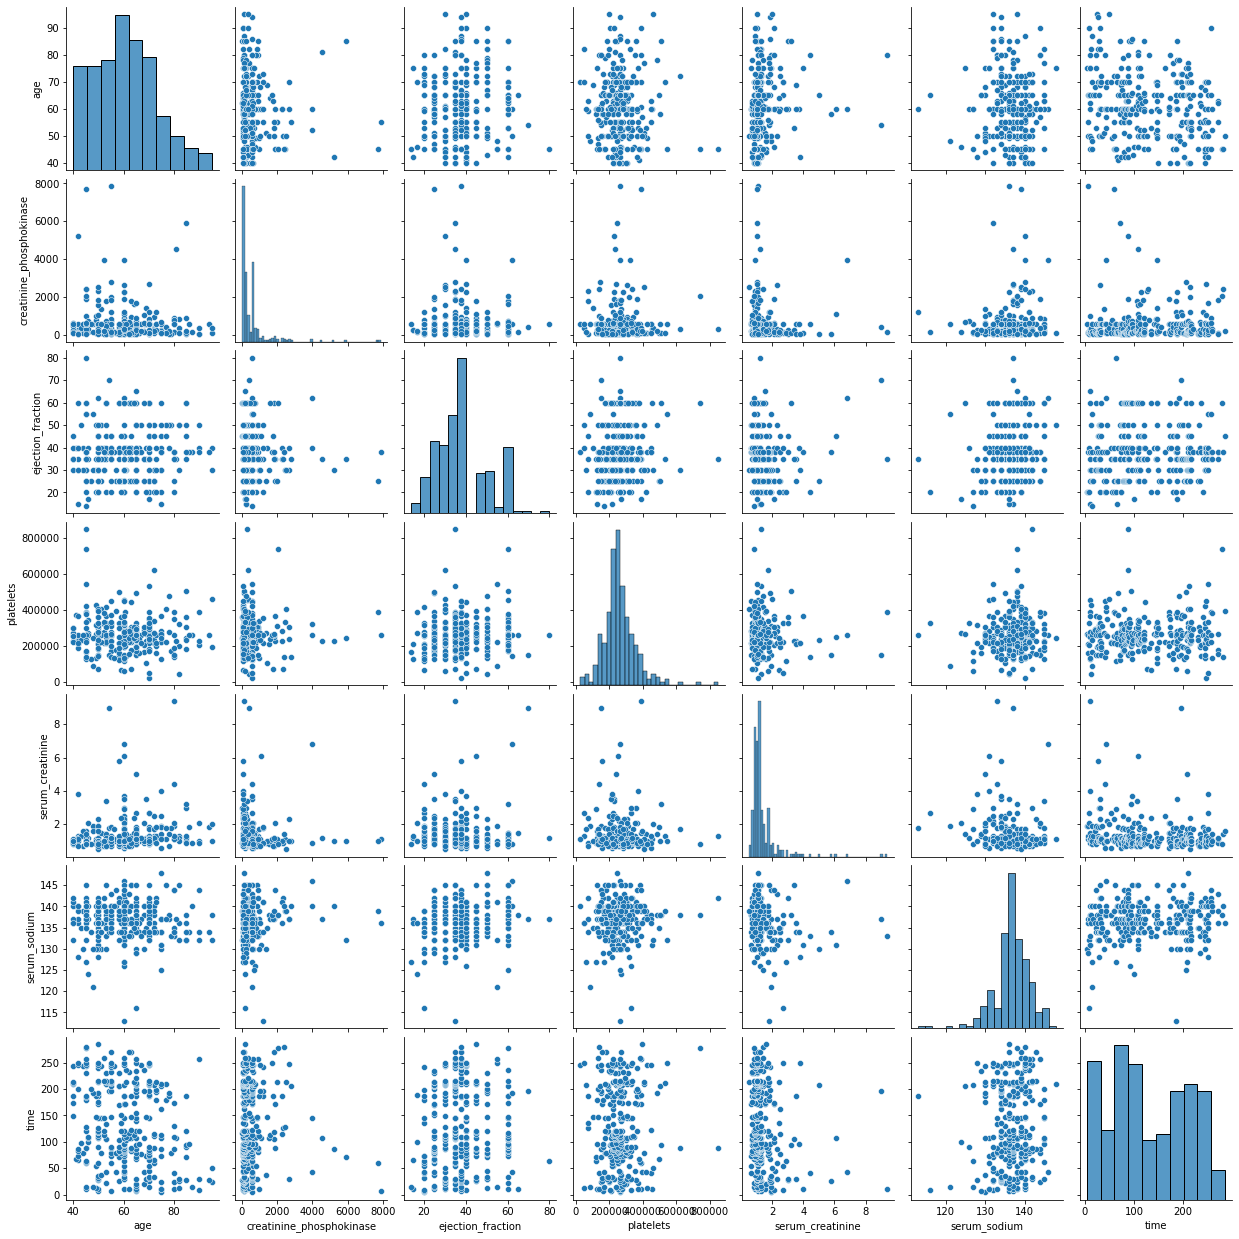

In [19]:
#Histogramy a Scatterploty dát pre zistenie normálového rozdelenia
sns.pairplot(data)
plt.show()

In [20]:
#Pomocou pairplotu vieme zobraziť histogramy pre numerické premenné a 
#scatterploty reprezentujú korelácie medzi týmito premennými
#Pohľadom na toto rozdelenie vidíme, že naše dáta nemajú normálové rozdelenie a
#nemôžme jednoznačne povedať, či korelácie su pozitívne alebo negatívne

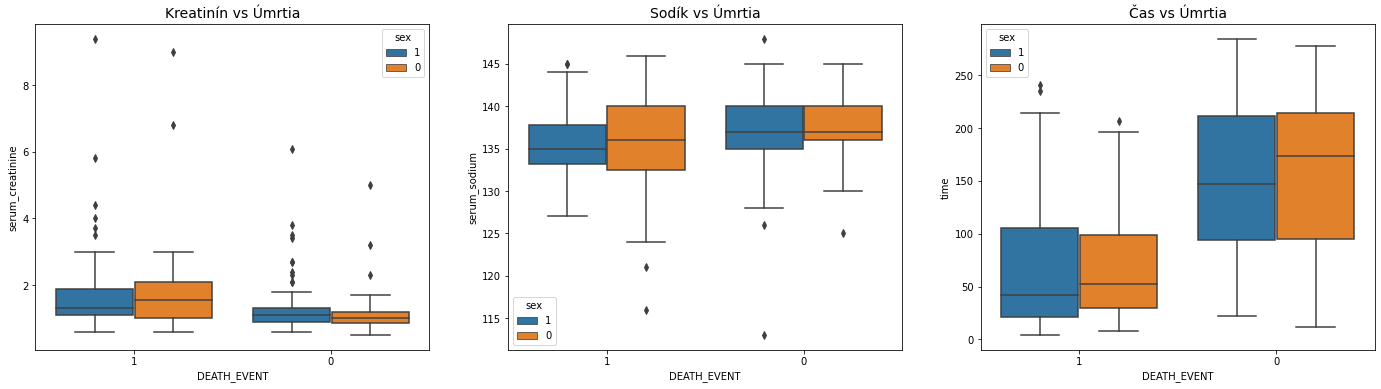

In [21]:
f, axes = plt.subplots(ncols=3, figsize=(24,6))
sns.boxplot(x='DEATH_EVENT', y="serum_creatinine", data=data,hue = 'sex', ax=axes[0])
axes[0].set_title('Kreatinín vs Úmrtia', fontsize = 14)

sns.boxplot(x='DEATH_EVENT', y="serum_sodium", data=data,hue = 'sex', ax=axes[1]) 
axes[1].set_title('Sodík vs Úmrtia', fontsize = 14)


sns.boxplot(x='DEATH_EVENT', y="time", data=data,hue = 'sex', ax=axes[2])
axes[2].set_title('Čas vs Úmrtia', fontsize = 14)
 
plt.show()

D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

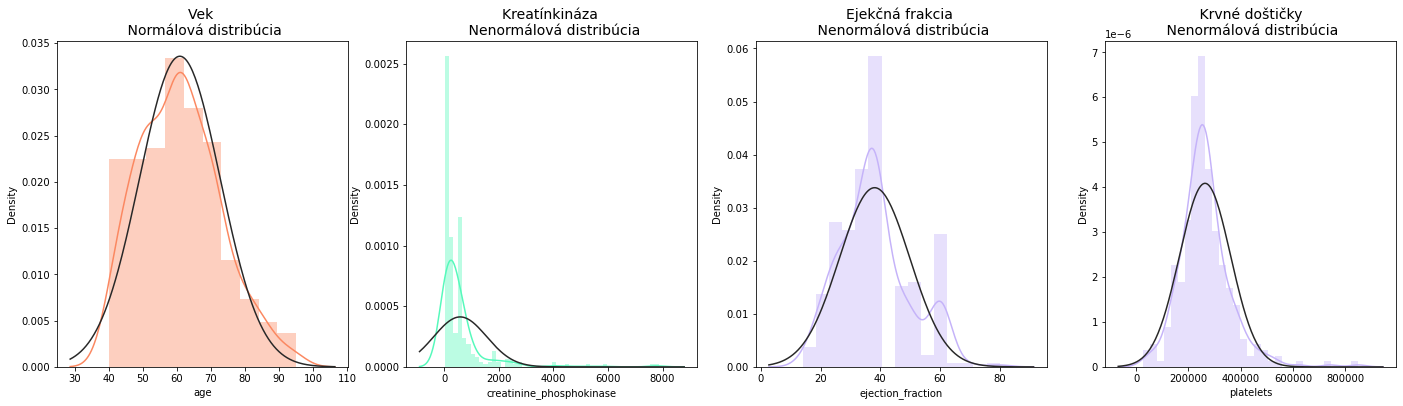

In [22]:
f, ax = plt.subplots(1,4, figsize=(24, 6))

sns.distplot(data['age'],fit=norm, color='#FB8861', ax = ax[0])
ax[0].set_title('Vek \n Normálová distribúcia', fontsize=14)

sns.distplot(data['creatinine_phosphokinase'], fit=norm, color='#56F9BB',ax=ax[1])
ax[1].set_title('Kreatínkináza \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['ejection_fraction'], fit=norm, color='#C5B3F9', ax = ax[2])
ax[2].set_title('Ejekčná frakcia \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['platelets'], fit=norm, color='#C5B3F9',ax = ax[3])
ax[3].set_title(' Krvné doštičky \n Nenormálová distribúcia', fontsize=14)

plt.show()

D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

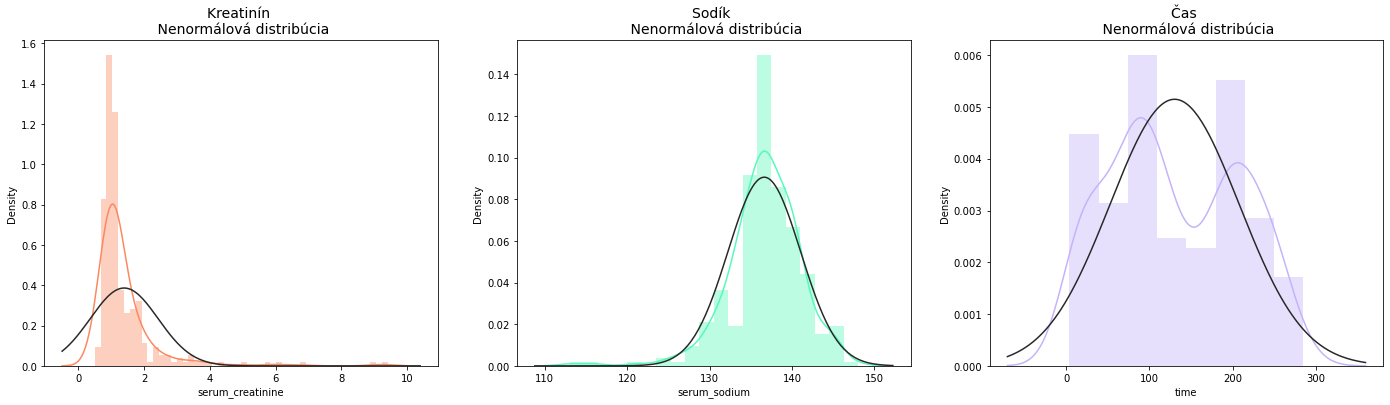

In [23]:
f, ax = plt.subplots(1,3, figsize=(24, 6))

sns.distplot(data['serum_creatinine'],fit=norm, color='#FB8861', ax = ax[0])
ax[0].set_title('Kreatinín \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['serum_sodium'], fit=norm, color='#56F9BB',ax=ax[1])
ax[1].set_title('Sodík \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['time'], fit=norm, color='#C5B3F9', ax = ax[2])
ax[2].set_title('Čas \n Nenormálová distribúcia', fontsize=14)

plt.show()

In [24]:
#Odstránenie odľahlých hodnôt
def odstranenie_odlahlych_hodnot(feature, feature_name, dataset): 
    # identifikácia kvartilov Q25 Q50 a Q75
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    median = q75 - q25
    feat_cut_off = median * 1.5
    spodný = q25 - feat_cut_off
    horný = q75 + feat_cut_off
    outliers = [x for x in feature if x < spodný or x > horný]
    dataset = dataset.drop(dataset[(dataset[feature_name] > horný) | (dataset[feature_name] < spodný)].index)    
    return dataset

data = odstranenie_odlahlych_hodnot(data['age'],'age', data)
data = odstranenie_odlahlych_hodnot(data['creatinine_phosphokinase'],'creatinine_phosphokinase', data)
data = odstranenie_odlahlych_hodnot(data['ejection_fraction'],'ejection_fraction', data)
data = odstranenie_odlahlych_hodnot(data['platelets'],'platelets', data)
data = odstranenie_odlahlych_hodnot(data['serum_creatinine'],'serum_creatinine', data)
data = odstranenie_odlahlych_hodnot(data['serum_sodium'],'serum_sodium', data)
data = odstranenie_odlahlych_hodnot(data['time'],'time', data)

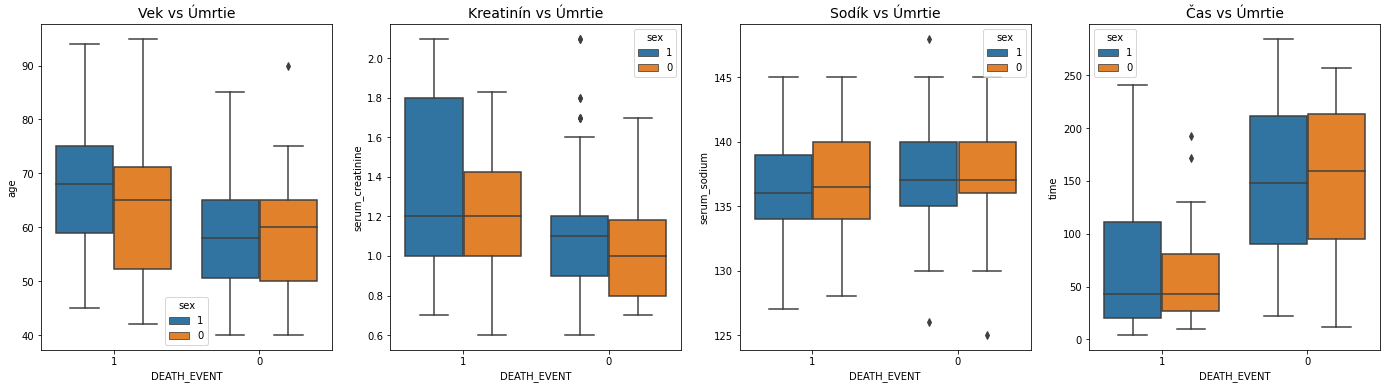

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='DEATH_EVENT', y="age", data=data, hue = 'sex',ax=axes[0])
axes[0].set_title('Vek vs Úmrtie', fontsize = 14)

sns.boxplot(x='DEATH_EVENT', y="serum_creatinine", data=data,hue = 'sex', ax=axes[1])
axes[1].set_title('Kreatinín vs Úmrtie', fontsize = 14)

sns.boxplot(x='DEATH_EVENT', y="serum_sodium", data=data,hue = 'sex', ax=axes[2]) 
axes[2].set_title('Sodík vs Úmrtie', fontsize = 14)


sns.boxplot(x='DEATH_EVENT', y="time", data=data,hue = 'sex', ax=axes[3])
axes[3].set_title('Čas vs Úmrtie', fontsize = 14)
 
plt.show()

D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

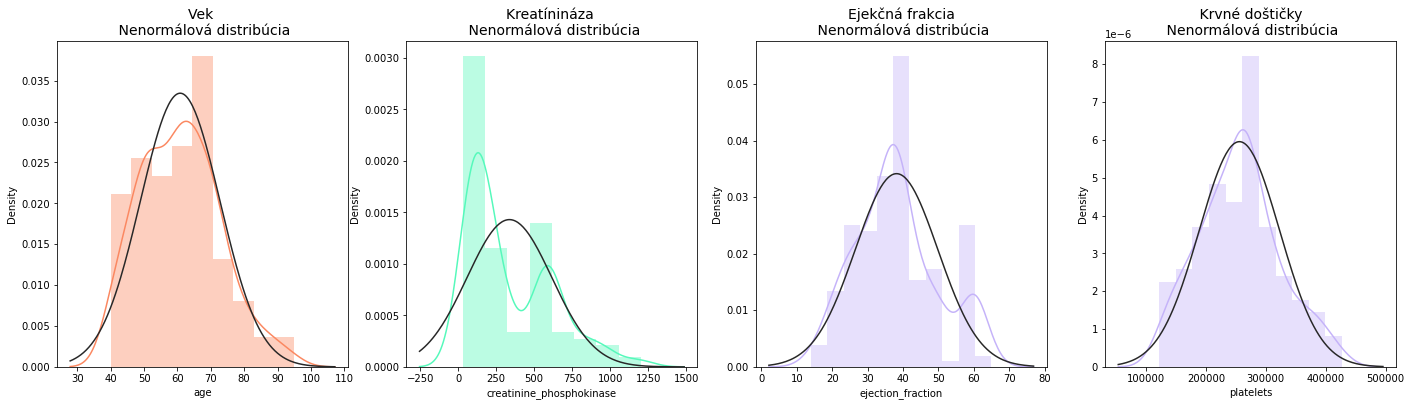

In [26]:
f, ax = plt.subplots(1,4, figsize=(24, 6))

sns.distplot(data['age'],fit=norm, color='#FB8861', ax = ax[0])
ax[0].set_title('Vek \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['creatinine_phosphokinase'], fit=norm, color='#56F9BB',ax=ax[1])
ax[1].set_title('Kreatínináza \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['ejection_fraction'], fit=norm, color='#C5B3F9', ax = ax[2])
ax[2].set_title('Ejekčná frakcia\n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['platelets'], fit=norm, color='#C5B3F9',ax = ax[3])
ax[3].set_title(' Krvné doštičky \n Nenormálová distribúcia', fontsize=14)

plt.show()

D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

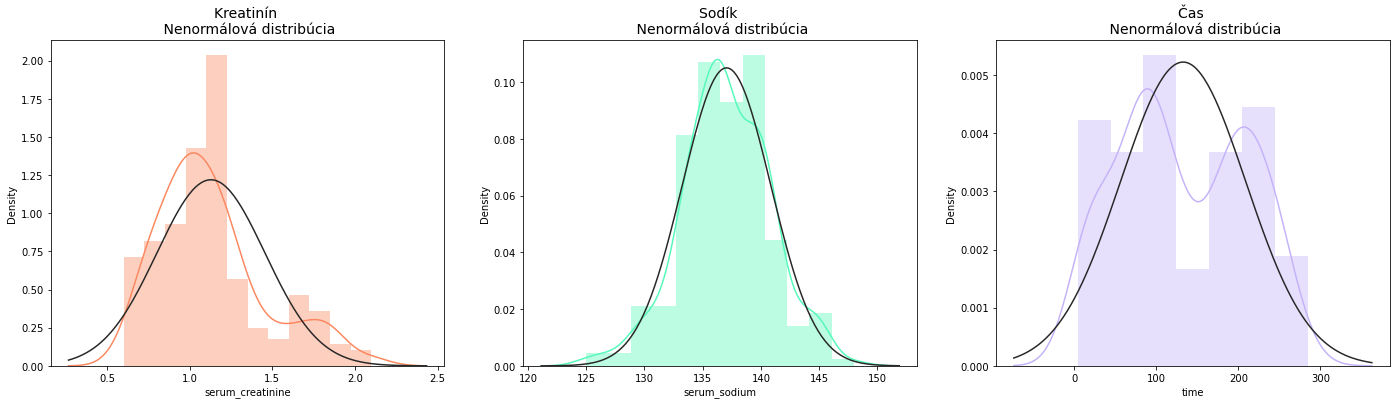

In [27]:
f, ax = plt.subplots(1,3, figsize=(24, 6))

sns.distplot(data['serum_creatinine'],fit=norm, color='#FB8861', ax = ax[0])
ax[0].set_title('Kreatinín \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['serum_sodium'], fit=norm, color='#56F9BB',ax=ax[1])
ax[1].set_title('Sodík \n Nenormálová distribúcia', fontsize=14)

sns.distplot(data['time'], fit=norm, color='#C5B3F9', ax = ax[2])
ax[2].set_title('Čas \n Nenormálová distribúcia', fontsize=14)

plt.show()

In [28]:
labels = data['DEATH_EVENT']
train = data.drop(['DEATH_EVENT'], axis = 1)